In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('n.csv')
pd.set_option("display.max_columns",None)

In [63]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


 EXPLORING DATA

In [64]:
df.shape

(8807, 12)

In [65]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 8.5 MB


In [66]:
nans=df.isna().sum().sort_values(ascending=False)
per=nans*100/df.shape[0]
per_all=pd.concat([nans,per],axis=1)
per_all

,0,1
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


1. COUNT OF MISSING VALUES VS ATTRIBUTES

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


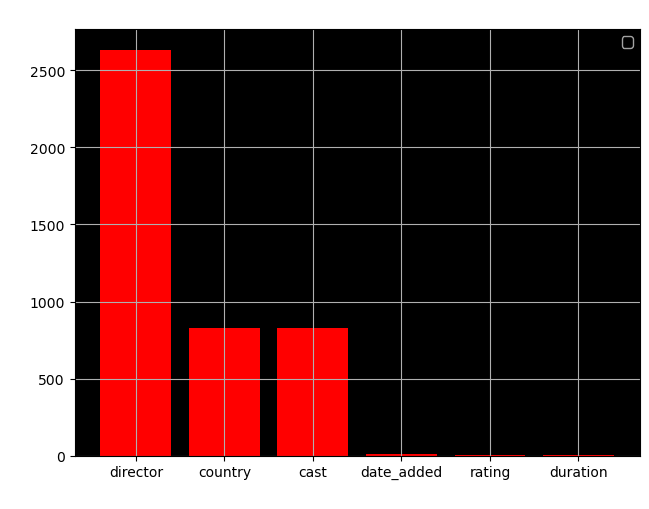

In [67]:
filt=per_all[0]!=0#filter all the columns with no missing values
x=per_all[filt]
plt.bar(x.index,x[0],color='red')
plt.grid(True)#grid for better readability
plt.tight_layout()#adjusts the spacing between the chart elements
plt.title("ATTRIBUTE/MISSING_VALUE_COUNTS")
plt.xlabel("ATTRIBUTE")
plt.ylabel("MISSING_VALUE_COUNTS")
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

In [68]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [69]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [70]:
duplicated_rows=df.duplicated().sum()
duplicated_rows

0

In [71]:
n_unique=df.nunique()*100/df.shape[0]
n_unique.to_frame().T

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,100.0,0.022709,100.0,51.413648,87.339616,8.493244,20.063586,0.840241,0.193028,2.498013,5.836267,99.636653


# CLEANING AND VISUALISATION

In [72]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [73]:
type_count=df['type'].value_counts()
type_count

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

2. TV SHOW VS MOVIE(COUNT)

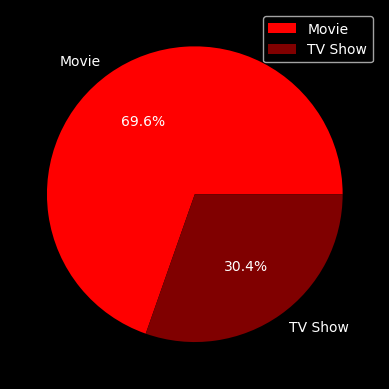

In [74]:
colors = ['red','maroon']
plt.figure(facecolor='black')
plt.pie(type_count.values,labels=type_count.index,autopct='%1.1f%%',colors=colors)
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
    plt.rc('text', color='white')
plt.rc('axes', labelcolor='white')

plt.show()

In [75]:
df['director'].isna().sum()

2634

In [76]:
years=df.groupby("release_year")['show_id'].count()
years

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: show_id, Length: 74, dtype: int64

3. RELEASE YEAR VS COUNT

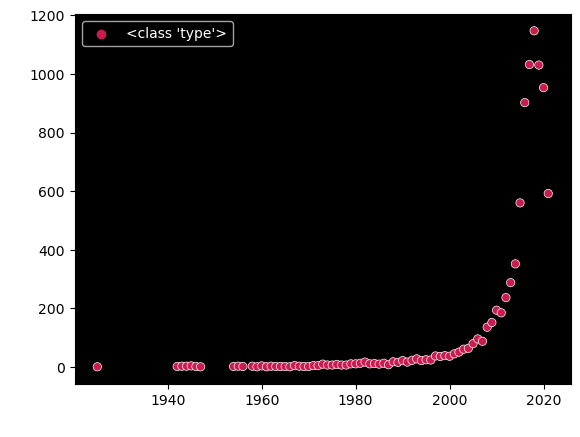

In [77]:
sns.scatterplot(x=years.index,y=years.values,palette='rocket',hue=type)
plt.ylabel("counts")
plt.show()

In [78]:
duration_filt=df.isnull()['duration'] == True
df[duration_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [79]:
nan_mask = df['duration'].isna()
df.loc[nan_mask, 'duration'] = df.loc[nan_mask, 'rating']

In [80]:
df['duration'].isna().sum()

0

In [81]:
country_filt=df.isnull()['country'] == True
df[country_filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8718,s8719,Movie,Westside vs. the World,Michael Fahey,"Ron Perlman, Louie Simmons",NaN,"August 9, 2019",2019,TV-MA,96 min,"Documentaries, Sports Movies",A look into the journey of influential strengt...
8759,s8760,Movie,World's Weirdest Homes,Storm Theunissen,Charlie Luxton,NaN,"February 1, 2019",2015,TV-PG,49 min,Movies,From a bubble-shaped palace to an island built...
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b..."
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o..."


In [82]:
nan_mask = df['country'].isna()
director_country = df.groupby('director')['country'].first().to_dict()

df.loc[nan_mask, 'country'] = df.loc[nan_mask].apply(lambda row:
                                                     director_country.get( row['director'], row['country'] ), axis=1
                                                    )


In [83]:
df.fillna("missing",inplace=True)

In [84]:
df.shape

(8807, 12)

In [85]:
filt=df['rating'].isin(['74 min','84 min','66 min'])
df.loc[filt,'rating']='missing'

In [86]:
rating_count=df['rating'].value_counts()

4.RATING VS COUNT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


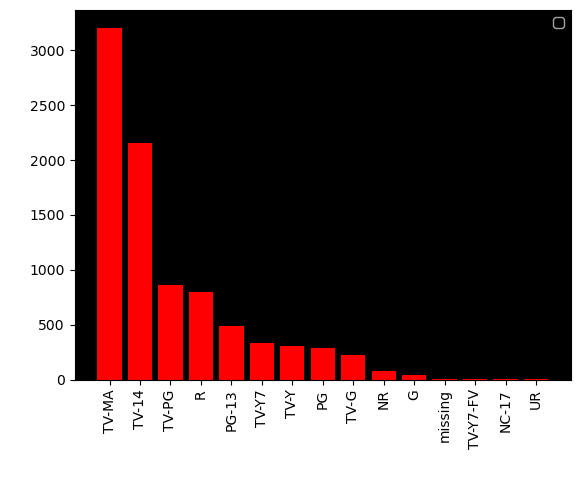

In [87]:
plt.bar(rating_count.index,rating_count.values,color='red')
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.ylabel("counts")
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

In [88]:
duration_filt=df['duration'].str.contains("min")


In [89]:
df[duration_filt]['duration'].value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [90]:
df[~duration_filt]['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

In [91]:
type_duration=df.groupby("type")['duration'].value_counts().to_frame()
type_duration.reset_index(inplace=True)


In [92]:
filt1=type_duration['type']=='Movie'
filt2=type_duration['type']=='TV Show'
x=type_duration[filt1]
y=type_duration[filt2]

In [93]:
#x.apply(lambda x:x['duration'].replace(' min',""))
x.loc[:,'duration']=x['duration'].str.replace(" min","")
x['duration']=x['duration'].astype(int)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19044\1657533900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['duration']=x['duration'].astype(int)


5.DURATION VS COUNT

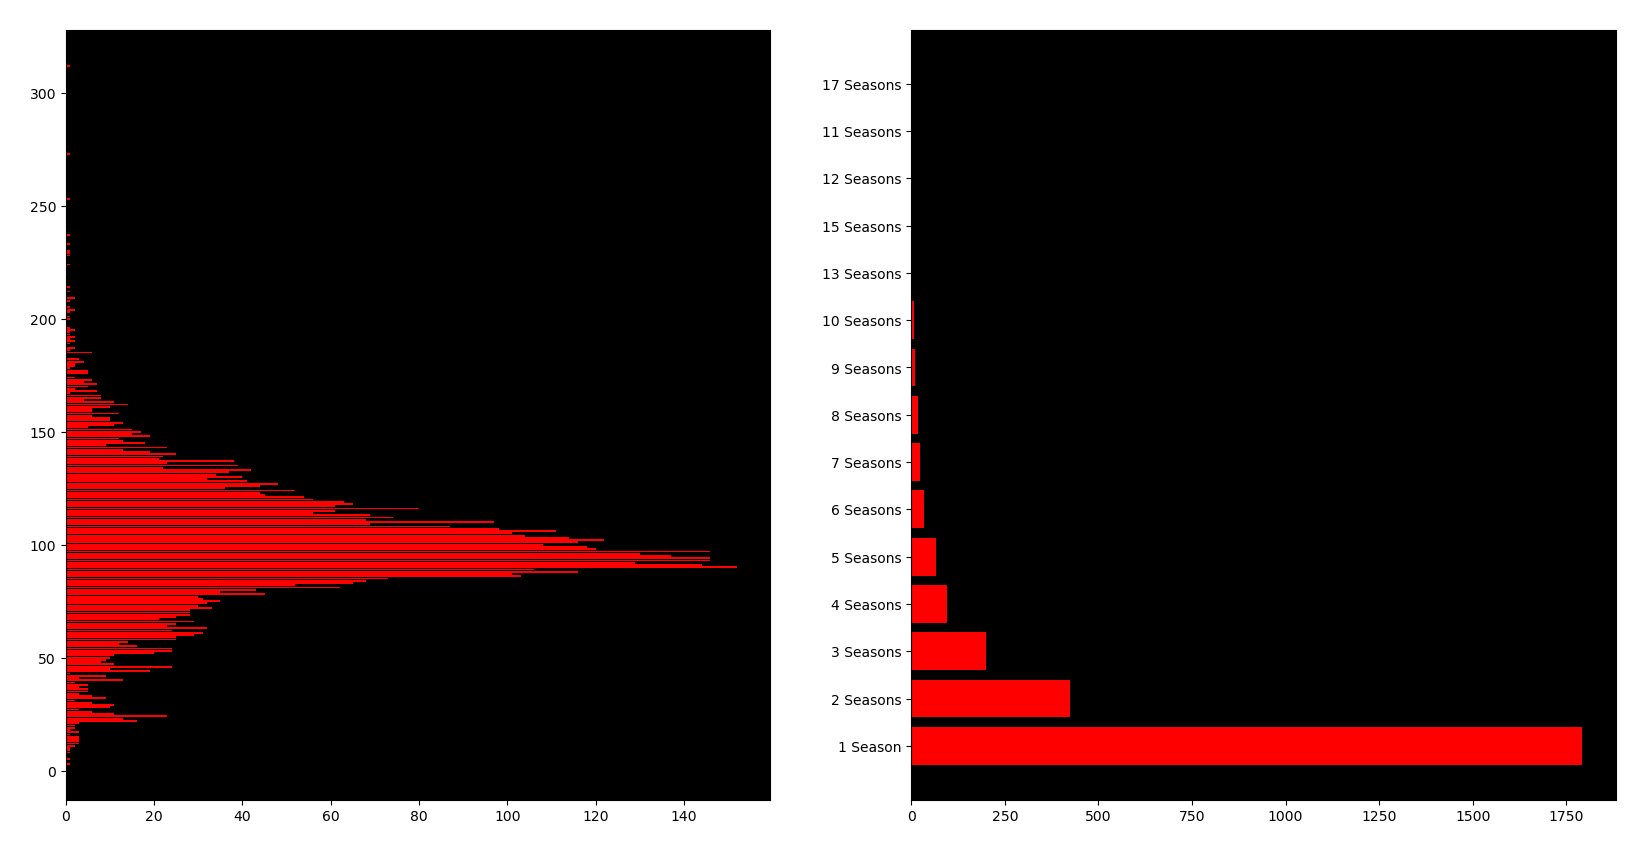

In [94]:
figsize=(20,5*2)
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=figsize)
axis[0].barh(x['duration'],x['count'],color='red')
axis[0].set_ylabel('Duration')
axis[0].set_xlabel("counts")
axis[0].set_title('Movies duration in mins')


axis[1].barh(y['duration'],y['count'],color='red')
axis[1].set_ylabel('Duration')
axis[1].set_xlabel("counts")
axis[1].set_title('TV shows duration in seasons')

plt.show()

In [95]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [96]:
years_added=df['date_added'].dt.year
y=years_added.value_counts()

6.YEAR VS ANNUAL PUBLISHING COUNT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


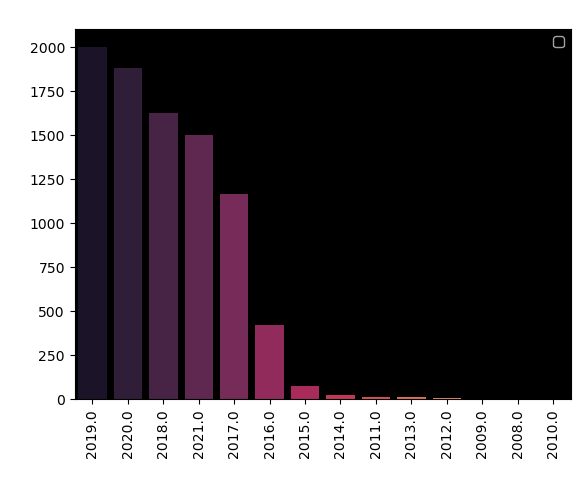

In [97]:
sns.barplot(x=y.index,y=y.values,order=y.index,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Counts")
plt.title("number of (tv shows and movies) publishing per year")
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

In [98]:
country=df['country'].str.split(",").to_frame()
country['first']=country['country'].apply(lambda x:x[0])

In [99]:
c=country['first'].value_counts().to_frame()

In [100]:
top_25=c['count'][:25]
top_25.index

Index(['United States', 'India', 'missing', 'United Kingdom', 'Canada',
       'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Egypt',
       'Australia', 'Turkey', 'Nigeria', 'Germany', 'China', 'Brazil',
       'Indonesia', 'Taiwan', 'Philippines', 'Hong Kong', 'Argentina', 'Italy',
       'Thailand', 'South Africa'],
      dtype='object', name='first')

7.COUNTRY VS PUBLISHING COUNT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


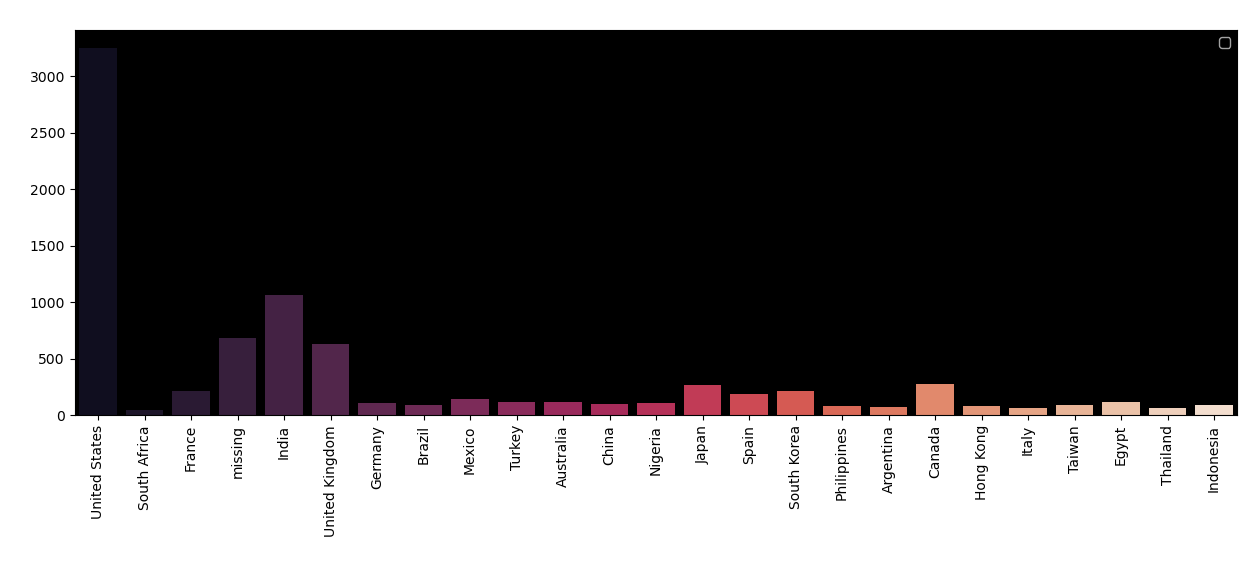

In [101]:
filt_country=country.loc[country['first'].isin(top_25.index),:]
plt.figure(figsize=(15,5))
sns.countplot(x='first',data=filt_country,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("count")
plt.title('top 25 countries publishing on netflix')
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

8.TV SHOW GENRE VS COUNT (WORDCLOUD)

In [102]:
shows=df['listed_in']

In [103]:
shows.value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [104]:
movies=df.loc[df['type']=='Movie',:]
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


9.WORDCLOUD

In [105]:
!pip install wordcloud

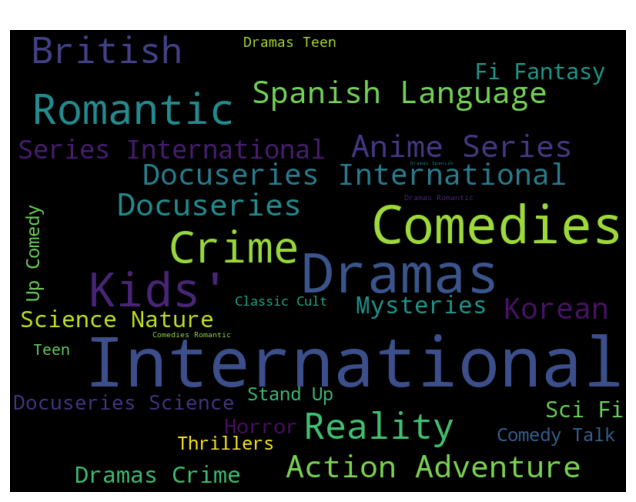

In [106]:
from wordcloud import WordCloud

# Combine all genres into a single string
all_genres = " ".join([genre.strip() for row in tv_show['listed_in'] for genre in row])

# Create the word cloud object
stopwords= {'TV','Shows'}
wordcloud = WordCloud(width=800, height=600, background_color="black" ,stopwords=stopwords)

# Generate the word cloud
wordcloud.generate(all_genres)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TV Show Genre Distribution")
plt.show()


In [107]:
tv_show=df.loc[df['type']=='TV Show',:]
tv_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,missing,missing,missing,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,missing,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,missing,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,missing,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [108]:
tv_show['listed_in']=tv_show['listed_in'].apply(lambda x:x.split(","))

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19044\371273804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['listed_in']=tv_show['listed_in'].apply(lambda x:x.split(","))


In [109]:
counter2=Counter()
for row in tv_show['listed_in']:
    for kind in row:
        counter2.update([kind.strip()])    

NameError: name 'Counter' is not defined

In [ ]:
Y2=list(counter2)
X2=list(counter2.values())

In [ ]:
sorted_elements_tv = counter2.most_common()
sorted_elements_tv=dict(sorted_elements_tv)

10.TV SHOW GENRES VS COUNT

In [110]:
sns.barplot(x=X2,y=Y2, palette='rocket',order=sorted_elements_tv.keys())
plt.xlabel("counts")
plt.ylabel("Genra")
plt.title("TV shows genres")
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

NameError: name 'X2' is not defined

11.COUNT VS RATING

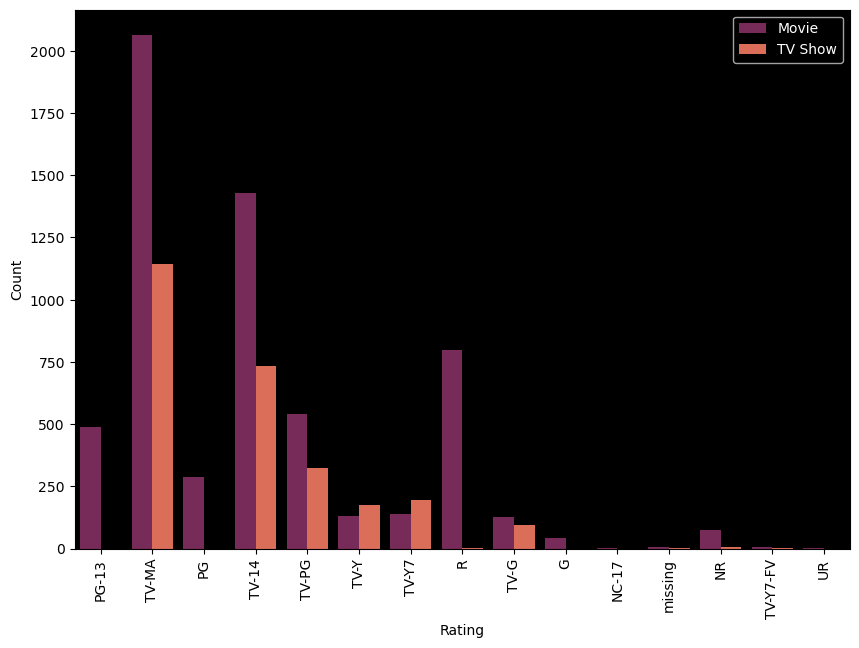

In [111]:
plt.figure(figsize=(10,7))
#plt.figure(facecolor='black')
sns.countplot(x='rating',data=df,hue="type",palette='rocket')
plt.tick_params(colors='black')
plt.xlabel("Rating", color='black')
plt.ylabel("Count", color='black')
plt.xticks(rotation=90)
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

12.PUBLISHING MONTH VS COUNT

In [112]:
sorted_m=(df['date_added'].dt.month).sort_values(ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


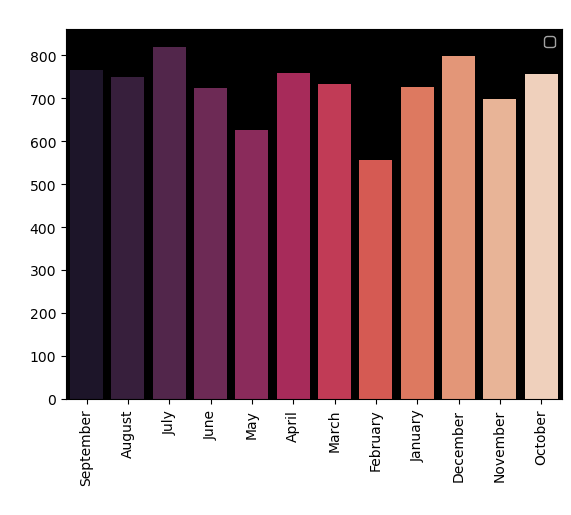

In [113]:
sns.countplot(x=df['date_added'].dt.month_name(),data=df, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('months')
plt.title("publishing months")
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()

13.RELEASE YEAR VS COUNT

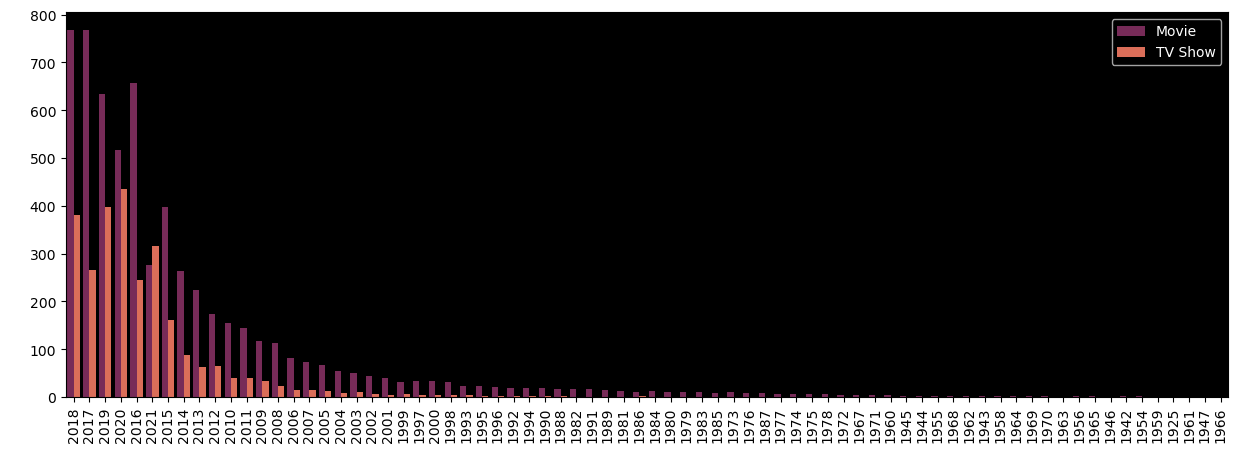

In [114]:
plt.figure(figsize=(15,5))
sns.countplot(x='release_year',
            data=df,palette='rocket', hue='type', order =df['release_year'].value_counts().index)
plt.xticks(rotation=90)
sns.set_style(rc={'axes.facecolor':'black'})
leg = plt.legend(loc='upper right')
for text in leg.get_texts():
    text.set_color('white')
plt.show()